### INTRODUCTION

## 

### BUSINESS UNDERSTANDING

##

### PROBLEM STATEMENT

##


### OBJECTIVES

##

## DATA UNDERSTANDING

### We are going to be using the data Twitter sentiments  about google and apple products  from CrowdFlower. This is the  [Link] to the data. The csv file contains  the following  variables

- `Tweet_text`: Tweet content
- `semotion_in_tweet_is_directed_at`: The type of device from which the twitter sentimnent was sent
- `emotion`: Emotion of the tweet ,the emotion is classifies as Negative, Positive ,no emotion  or a state where the person could not classify the emotion in the tween , labeled as "I can't tell"



## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Loading Data

In [24]:
import pandas as pd
data = pd.read_csv('data\judge-1377884607_tweet_product_company.csv',encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Exploratory Data Analysis

In [25]:
data["emotion_in_tweet_is_directed_at"].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

<AxesSubplot:>

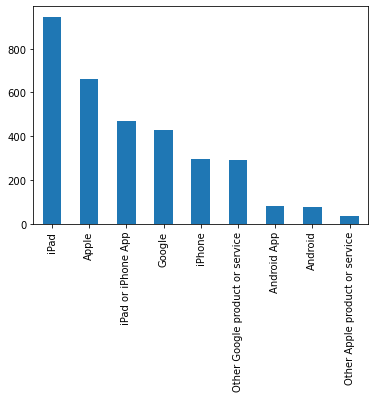

In [26]:
data["emotion_in_tweet_is_directed_at"].value_counts().plot(kind="bar")

In [27]:
data["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

<AxesSubplot:ylabel='is_there_an_emotion_directed_at_a_brand_or_product'>

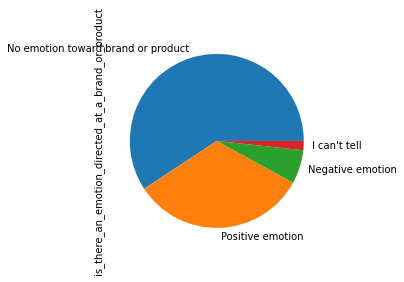

In [20]:
data["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts().plot(kind="pie")

## Data Preprocessing

### *standardizing Case*
### Converting the Text Data in to lowercase

In [37]:
data["cleaned_tweet"] = data['tweet_text'].str.lower()
print (data['cleaned_tweet'][0])

#data['tweet_text'] = data['tweet_text'].str.replace('[^\w\s]','')

.@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.


### *Removing username From Tweets*
 ### We use the Regular Expression "\b\@\w*\w*\b" to take care of all the Twitter usernames in this tweet Text Coulumn. Below is a brief description of the Regex.
 - \b: This is a word boundary, meaning it will match the start or end of a word.

 - \: This is a literal colon.

 - \w*: This is a shorthand character class that matches any word character, which includes letters (both uppercase and lowercase), digits (0-9), and underscores (_).

 - \w*: This is another shorthand character class that matches any word character, which includes letters (both uppercase and lowercase), digits (0-9), and underscores (_).

In [39]:

data["cleaned_tweet"] = data["cleaned_tweet"].str.replace('\b\w*@\w*\w*\b','')
print(data["cleaned_tweet"][0])

.@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead!  i need to upgrade. plugin stations at #sxsw.


### *Removing Punctuation*
### We use the Regular Expression "[^\w\s]" to take care of all forms of puntuations in this tweet Text Coulumn. below is a brief description of the Regex.

1. []: This denotes a character class, which matches any single character that is included within the brackets.

2. ^: When placed at the beginning of a character class, the caret ^ negates the character class, meaning it will match any character that is not in the specified set.

3. \w: This is a shorthand character class that matches any word character, which includes letters (both uppercase and lowercase), digits (0-9), and underscores (_).

4. \s: This is another shorthand character class that matches any whitespace character, which includes spaces, tabs, and newlines.

Putting it all together, the regex pattern r'[^\w\s]' matches any character that is not a word character (like letters, digits, or underscores) and not a whitespace character. In other words, it will match punctuation marks and special symbols.

In [40]:
data['tweet_text'] = data['tweet_text'].str.replace('r[^\w\s]','')
print (data['tweet_text'][0])

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.


### *Removing Stopwords*